<a href="https://colab.research.google.com/github/Fahad-Moinuddin/Test/blob/main/Spam_email_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Pandas**⏳

In [43]:
!pip install pandas scikit-learn matplotlib seaborn

**Create the dataframe** 📑

In [44]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Change Column Names** 😀

In [45]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Ham vs Spam** 🥊

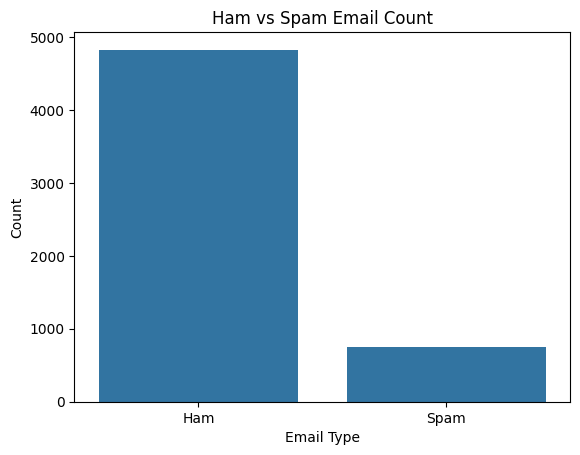

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title('Ham vs Spam Email Count')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

**Vectorize Messages** 🔢

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])

**Train Model** 🤖

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, df['label'].map({'ham': 0, 'spam': 1}), test_size=0.2)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       1.00      0.81      0.90       164

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



**Save model** ✅

In [49]:
import joblib
joblib.dump(model, 'spam_classifier.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

**Write Your Own Email** 🧪

In [50]:
email = "Claim your free prize now! Click this link to win. You've been selected for a $1000 gift card. Don't miss out!"
email_vectorized = vectorizer.transform([email])
prediction = model.predict(email_vectorized)
print("Spam" if prediction[0] == 1 else "Not spam")

Spam


**Get Common SCAM Words**

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import numpy as np

df['label'] = df['label'].map({'ham': 0, 'spam': 1})
spam_messages = df[df['label'] == 1]['message']

vectorizer = CountVectorizer(stop_words='english')  # removes common words like "the", "is"
print(len(spam_messages))
print(df['label'].unique())


X_spam = vectorizer.fit_transform(spam_messages)

word_counts = np.array(X_spam.sum(axis=0)).flatten()
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))


747
[0 1]


**Top 20 SCAM Words**

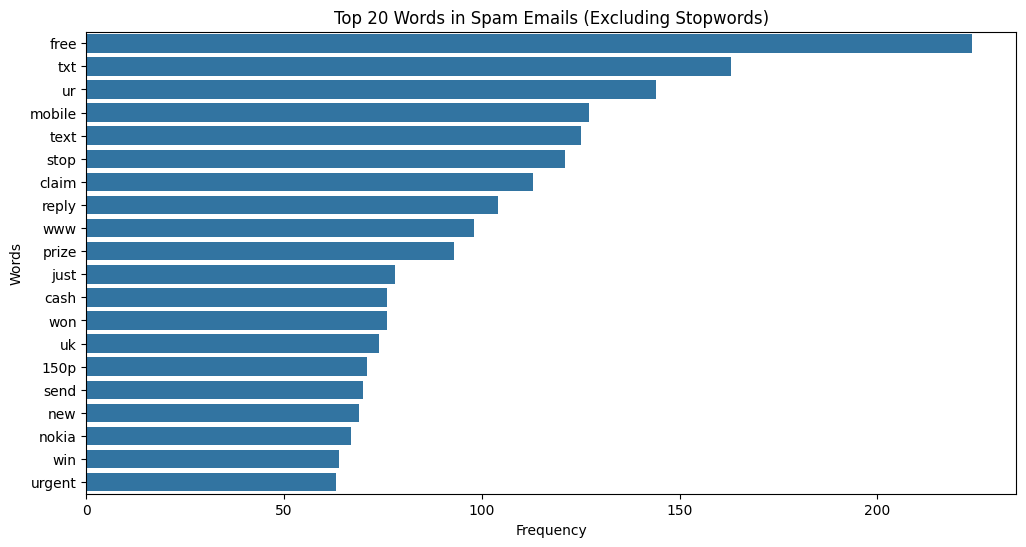

In [52]:
top_words = Counter(word_freq).most_common(20)

words, counts = zip(*top_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Top 20 Words in Spam Emails (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()